In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

import sys
sys.path.insert(0, "../")
import functions

# Mittelwert-Vorhersage

            verbrauch   wochentag
datum                            
2015-01-01     126197  Donnerstag
2015-01-02     147085     Freitag
2015-01-03     141426     Samstag
2015-01-04     132446     Sonntag
2015-01-05     152611      Montag
...               ...         ...
2021-12-27     153489      Montag
2021-12-28     155182    Dienstag
2021-12-29     153611    Mittwoch
2021-12-30     148126  Donnerstag
2021-12-31     137327     Freitag

[2557 rows x 2 columns]

            count           mean           std       min       25%       50%       75%       max
verbrauch  2557.0  169329.063355  27116.871253  102469.0  147992.0  175584.0  190001.0  231190.0

Verbrauch an Montagen:		 177812.44109589042
Verbrauch an Dienstagen:	 185373.47397260275
Verbrauch an Mittwochen:	 185769.44109589042
Verbrauch an Donnerstagen:	 182519.87978142078
Verbrauch an Freitagen:		 178270.85792349727
Verbrauch an Samstagen:		 145220.4301369863
Verbrauch an Sonntagen:		 130276.28219178082

            verbrauch

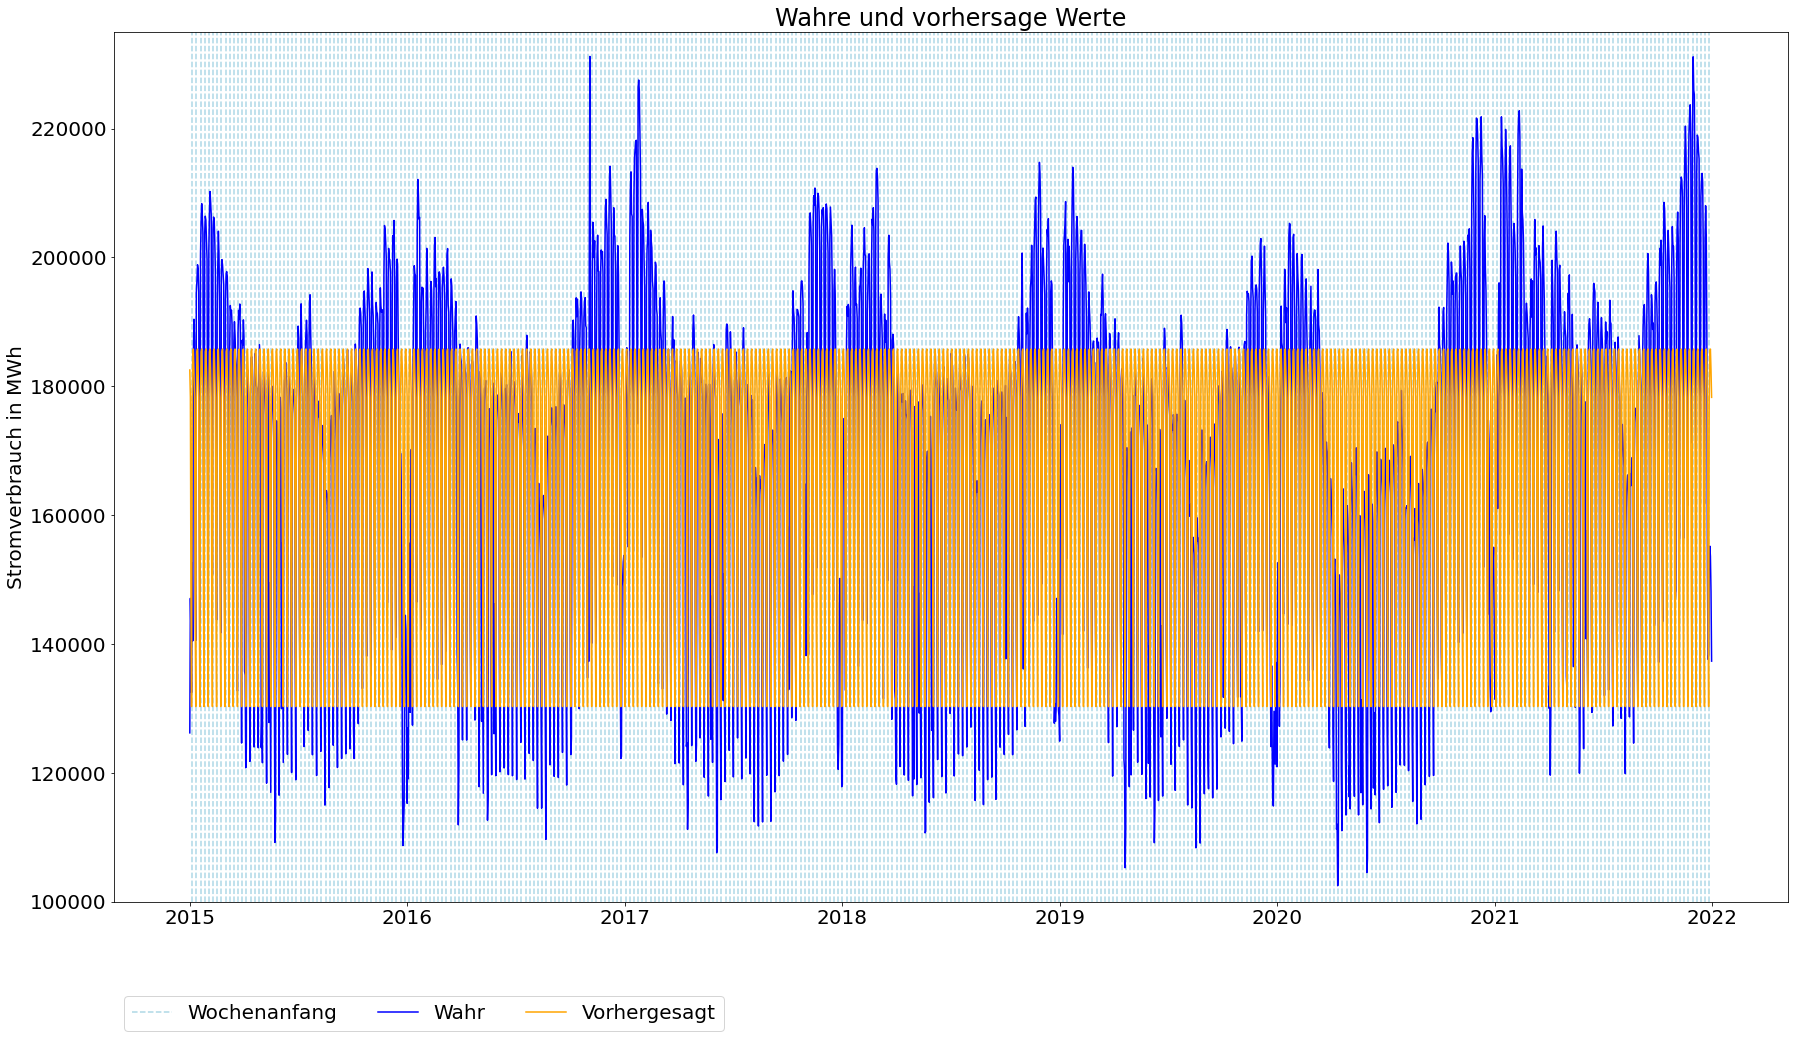

Nur Testdaten

              Test
R2            0.45
MAE        15598.4
MSE   382259970.22
RMSE      19551.47
                  
MAPE         8.6 %


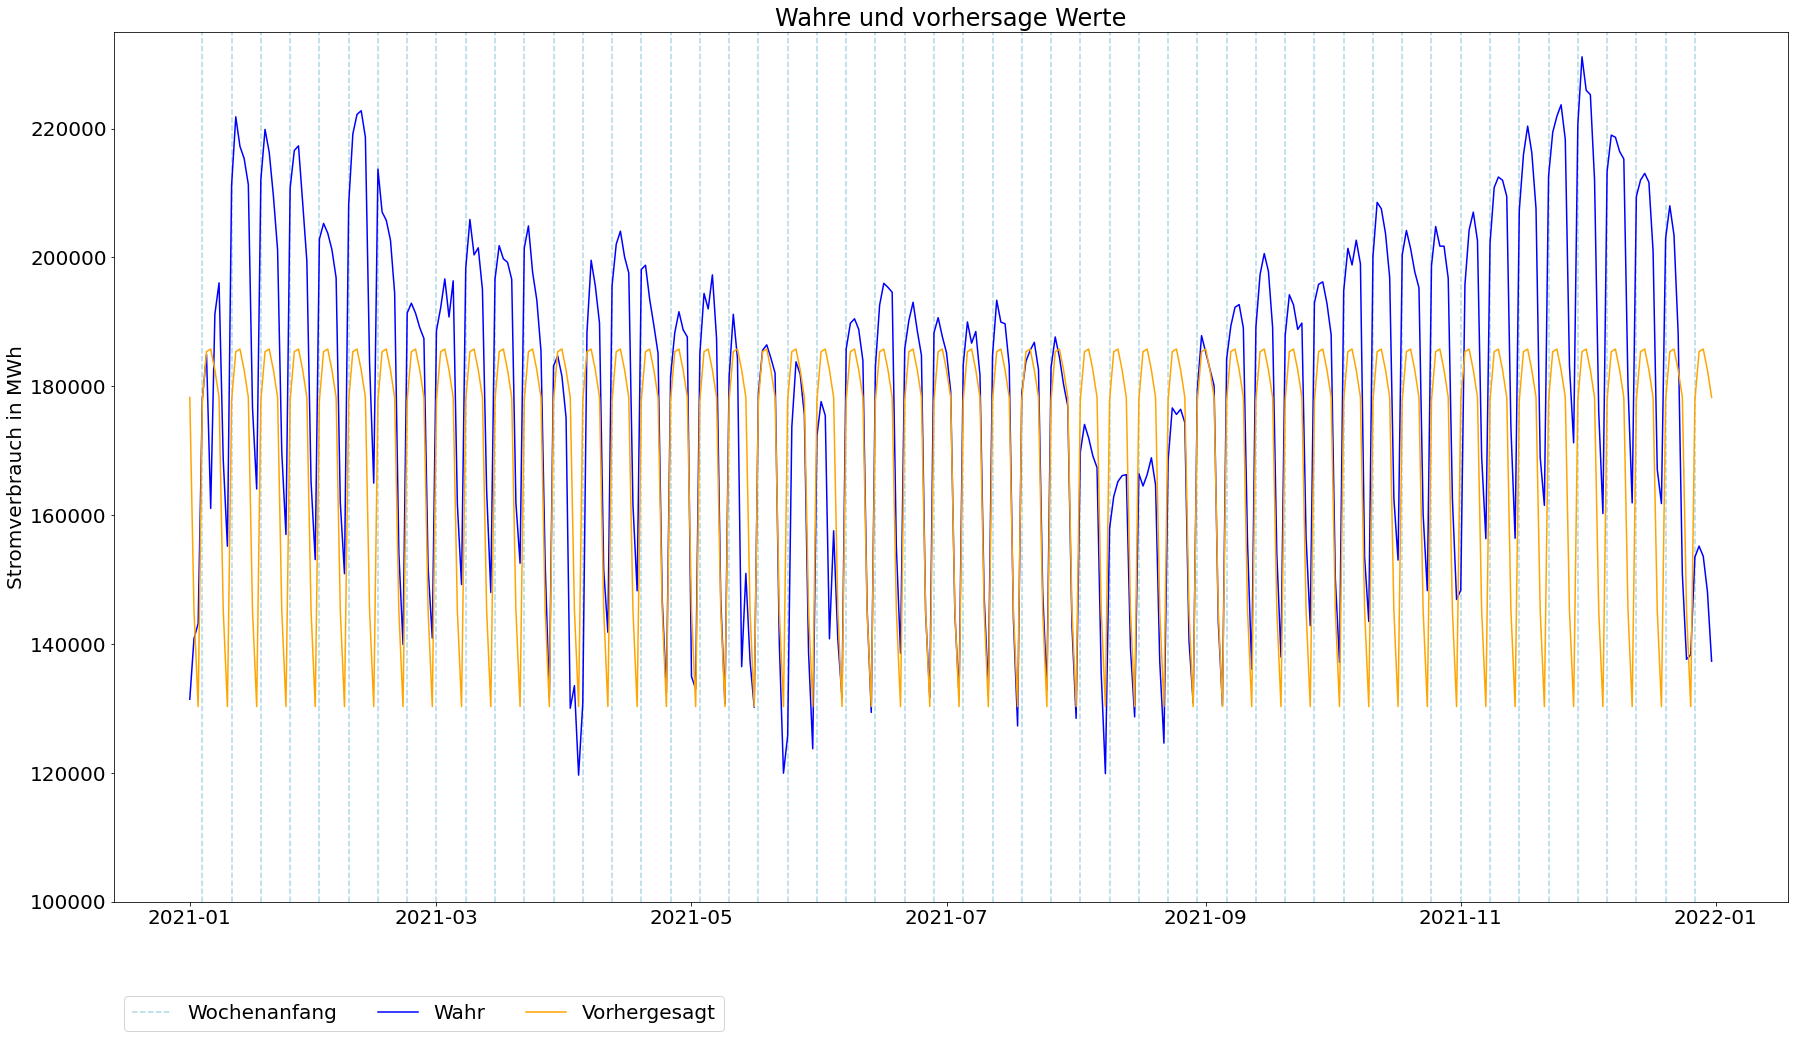

In [2]:
df = pd.read_csv("../2-Data Understanding/data.csv", index_col=0, parse_dates=True, usecols=[0, 1, 3])
df.index.freq = "D"

print(df)
print()
print(df.describe().transpose())
print()

print("Verbrauch an Montagen:\t\t", df[df["wochentag"] == "Montag"]["verbrauch"].mean())
print("Verbrauch an Dienstagen:\t", df[df["wochentag"] == "Dienstag"]["verbrauch"].mean())
print("Verbrauch an Mittwochen:\t", df[df["wochentag"] == "Mittwoch"]["verbrauch"].mean())
print("Verbrauch an Donnerstagen:\t", df[df["wochentag"] == "Donnerstag"]["verbrauch"].mean())
print("Verbrauch an Freitagen:\t\t", df[df["wochentag"] == "Freitag"]["verbrauch"].mean())
print("Verbrauch an Samstagen:\t\t", df[df["wochentag"] == "Samstag"]["verbrauch"].mean())
print("Verbrauch an Sonntagen:\t\t", df[df["wochentag"] == "Sonntag"]["verbrauch"].mean())
print()

weekly_means = [
    df[df["wochentag"] == "Montag"]["verbrauch"].mean(),
    df[df["wochentag"] == "Dienstag"]["verbrauch"].mean(),
    df[df["wochentag"] == "Mittwoch"]["verbrauch"].mean(),
    df[df["wochentag"] == "Donnerstag"]["verbrauch"].mean(),
    df[df["wochentag"] == "Freitag"]["verbrauch"].mean(),
    df[df["wochentag"] == "Samstag"]["verbrauch"].mean(),
    df[df["wochentag"] == "Sonntag"]["verbrauch"].mean()
]

weekdays = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]

weekly_predictions = pd.DataFrame(data=[weekly_means, weekdays])
weekly_predictions = weekly_predictions.transpose()
weekly_predictions.columns = ["vorhergesagter verbrauch", "wochentag"]
weekly_predictions.set_index("wochentag", inplace=True)

df = df.join(other=weekly_predictions, on="wochentag", how="left")

print(df)
print()
print(df.describe().transpose())
print()

print("Gesamte Daten (mit Trainingsdaten)\n")
functions.custom_metrics(df["verbrauch"], df["vorhergesagter verbrauch"])

print("Nur Testdaten\n")
functions.custom_metrics(df["verbrauch"].iloc[-365:], df["vorhergesagter verbrauch"].iloc[-365:])

# Gleitender-Durchschnitt-Vorhersage

            verbrauch
datum                
2015-01-01     126197
2015-01-02     147085
2015-01-03     141426
2015-01-04     132446
2015-01-05     152611
...               ...
2021-12-27     153489
2021-12-28     155182
2021-12-29     153611
2021-12-30     148126
2021-12-31     137327

[2557 rows x 1 columns]

            count           mean           std       min       25%       50%       75%       max
verbrauch  2557.0  169329.063355  27116.871253  102469.0  147992.0  175584.0  190001.0  231190.0

            verbrauch  vorhergesagter verbrauch
datum                                          
2015-01-07     184936             146453.571429
2015-01-08     190395             155624.714286
2015-01-09     186902             161312.857143
2015-01-10     150311             162582.142857
2015-01-11     140494             163731.857143
...               ...                       ...
2021-12-27     153489             168575.428571
2021-12-28     155182             161029.285714
2021-12-29   

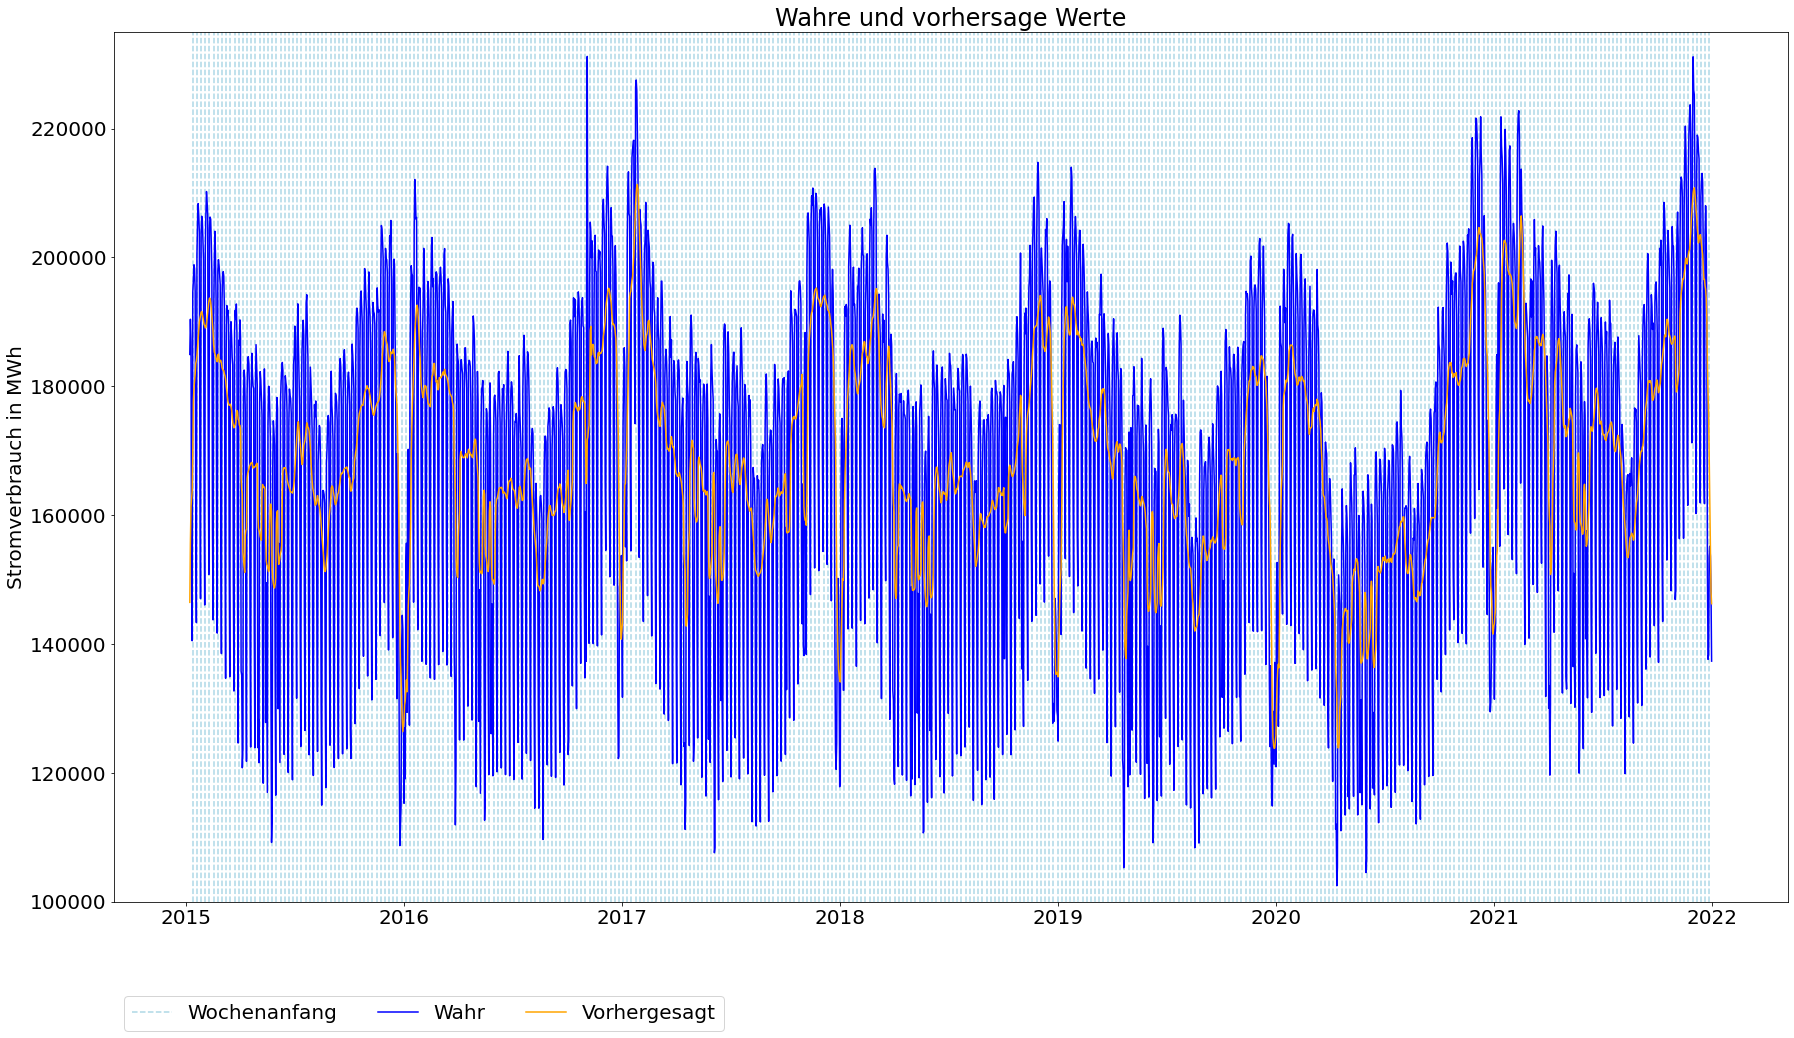

Nur Testdaten

              Test
R2            0.29
MAE       19250.57
MSE   494621990.42
RMSE       22240.1
                  
MAPE       11.59 %


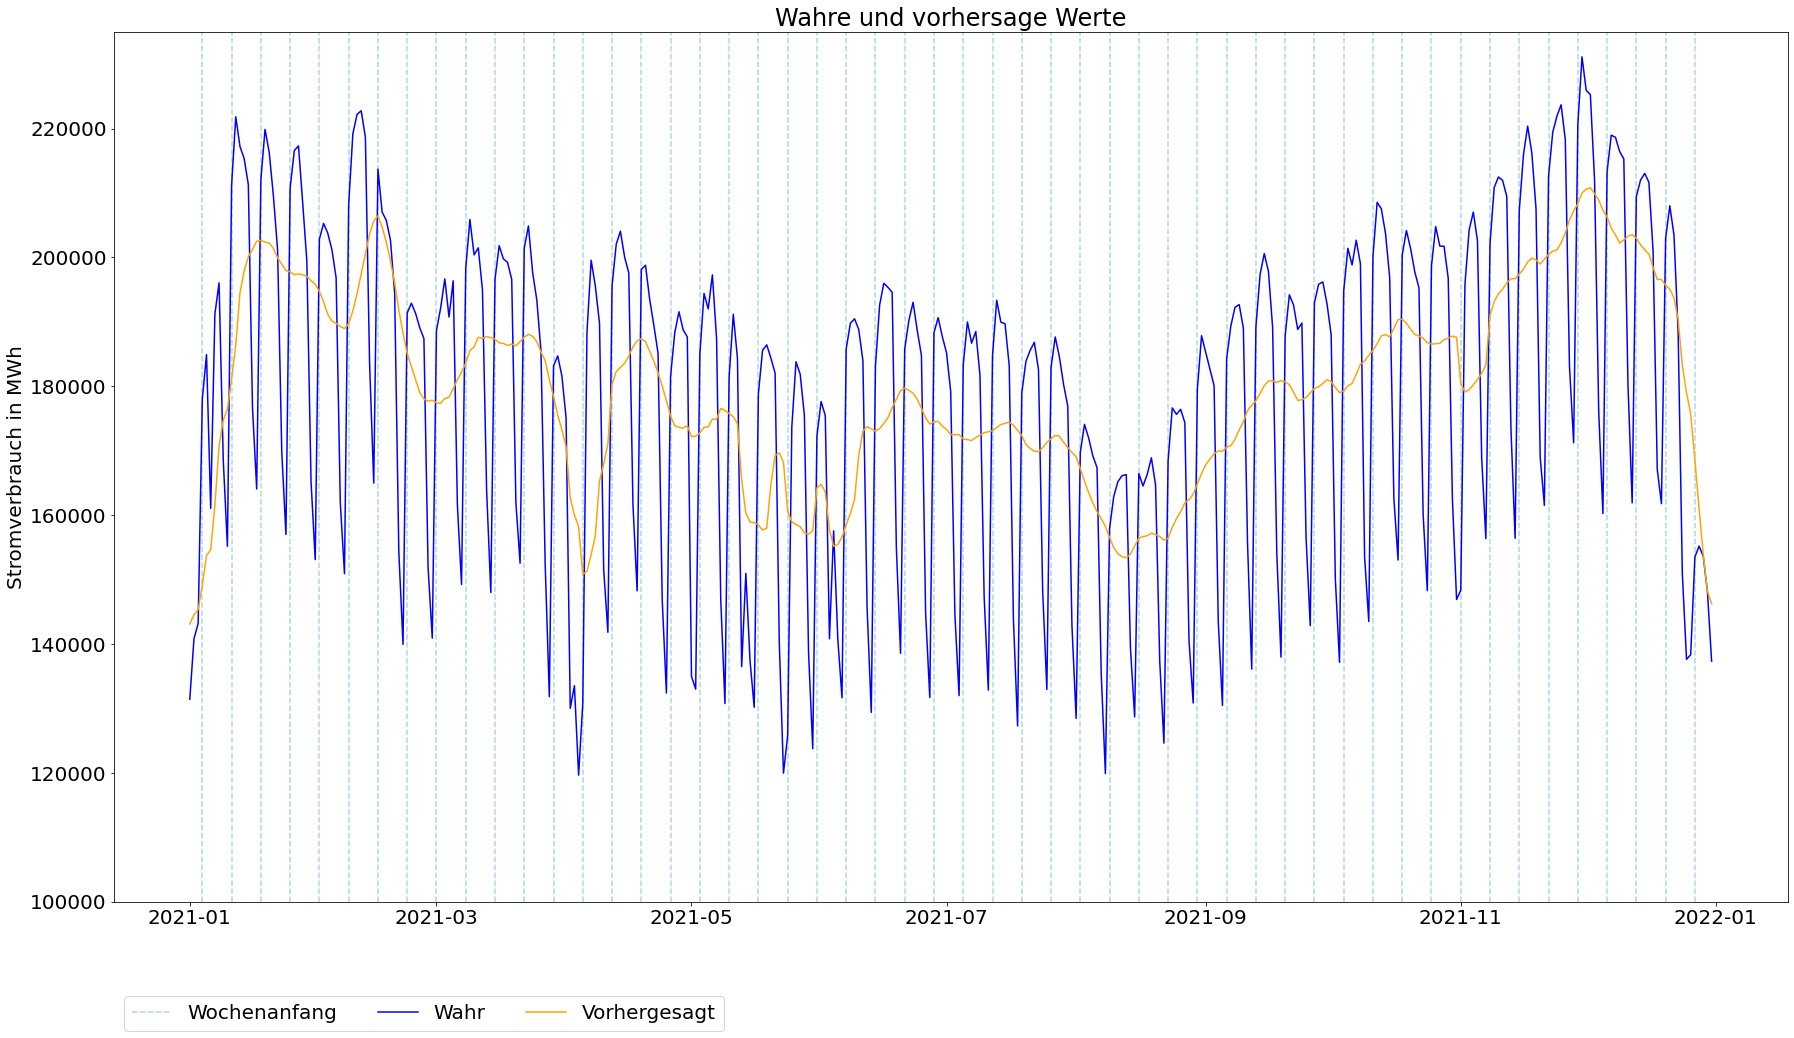

In [3]:
df = pd.read_csv("../2-Data Understanding/data.csv", index_col=0, parse_dates=True, usecols=[0, 1])
df.index.freq = "D"

print(df)
print()
print(df.describe().transpose())
print()

df["vorhergesagter verbrauch"] = df["verbrauch"].rolling(window=7).mean()
df.dropna(inplace=True)
print(df)
print()
print(df.describe().transpose())
print()

print("Gesamte Daten (mit Trainingsdaten)\n")
functions.custom_metrics(df["verbrauch"], df["vorhergesagter verbrauch"])

print("Nur Testdaten\n")
functions.custom_metrics(df["verbrauch"].iloc[-365:], df["vorhergesagter verbrauch"].iloc[-365:])

# Zero-Rule-Vorhersage

            verbrauch
datum                
2015-01-01     126197
2015-01-02     147085
2015-01-03     141426
2015-01-04     132446
2015-01-05     152611
...               ...
2021-12-27     153489
2021-12-28     155182
2021-12-29     153611
2021-12-30     148126
2021-12-31     137327

[2557 rows x 1 columns]

            count           mean           std       min       25%       50%       75%       max
verbrauch  2557.0  169329.063355  27116.871253  102469.0  147992.0  175584.0  190001.0  231190.0

            verbrauch  vorhergesagter verbrauch
datum                                          
2015-01-02     147085                  126197.0
2015-01-03     141426                  147085.0
2015-01-04     132446                  141426.0
2015-01-05     152611                  132446.0
2015-01-06     140474                  152611.0
...               ...                       ...
2021-12-27     153489                  138335.0
2021-12-28     155182                  153489.0
2021-12-29   

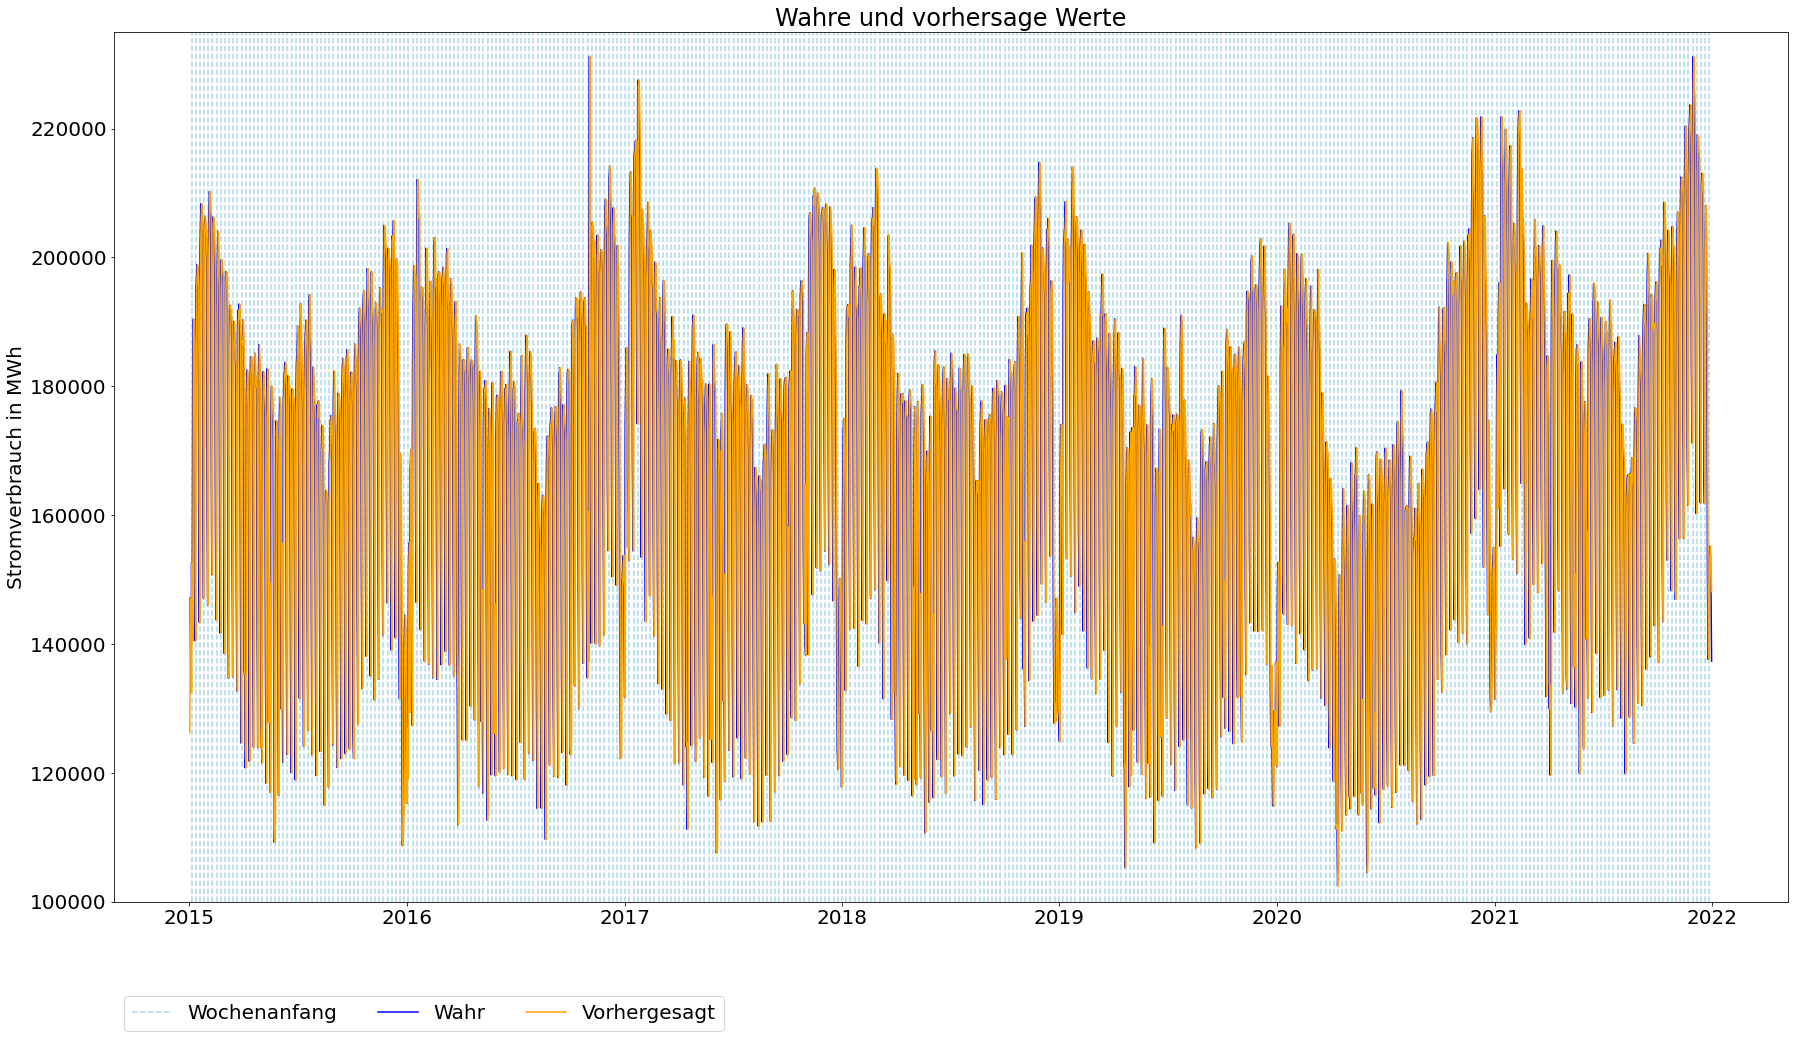

Nur Testdaten

              Test
R2            0.16
MAE       16642.88
MSE   583593521.59
RMSE      24157.68
                  
MAPE        9.77 %


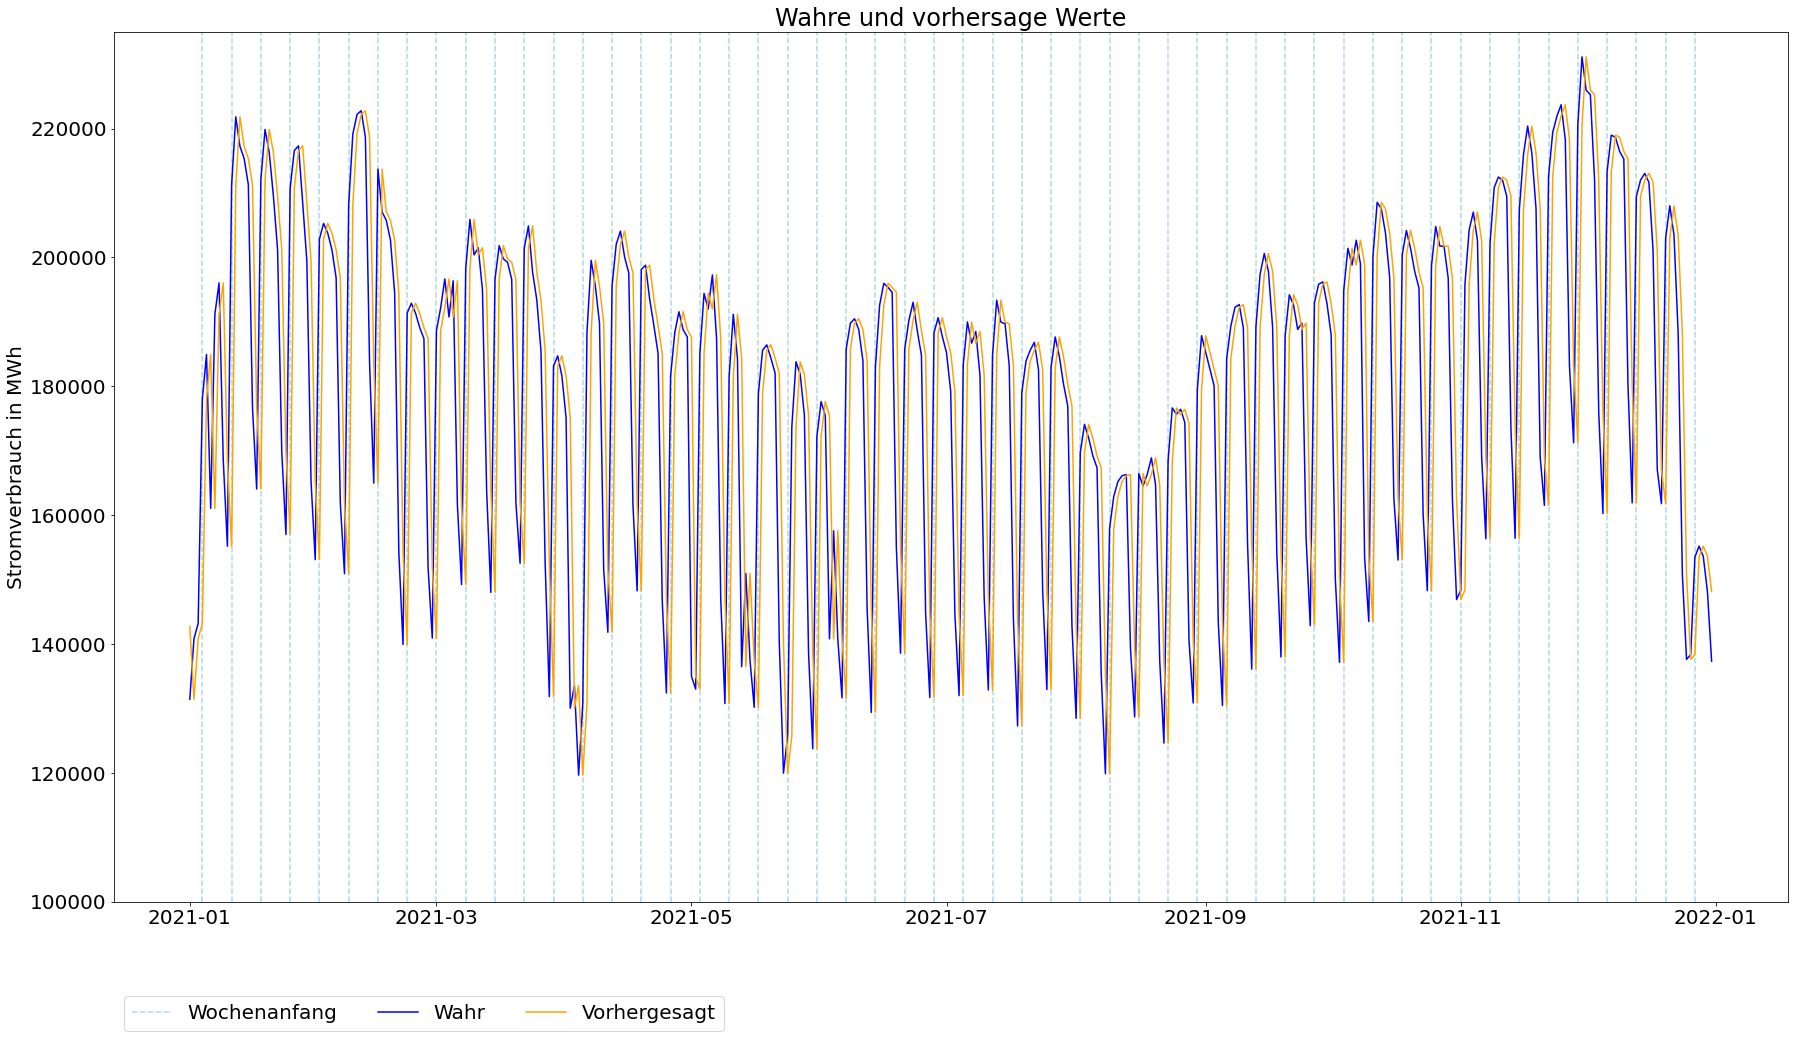

In [4]:
df = pd.read_csv("../2-Data Understanding/data.csv", index_col=0, parse_dates=True, usecols=[0, 1])
df.index.freq = "D"

print(df)
print()
print(df.describe().transpose())
print()

df["vorhergesagter verbrauch"] = df["verbrauch"].shift(1)
df.dropna(inplace=True)
print(df)
print()
print(df.describe().transpose())
print()

print("Gesamte Daten (mit Trainingsdaten)\n")
functions.custom_metrics(df["verbrauch"], df["vorhergesagter verbrauch"])

print("Nur Testdaten\n")
functions.custom_metrics(df["verbrauch"].iloc[-365:], df["vorhergesagter verbrauch"].iloc[-365:])

# Saisonale Zero-Rule-Vorhersage

            verbrauch
datum                
2015-01-01     126197
2015-01-02     147085
2015-01-03     141426
2015-01-04     132446
2015-01-05     152611
...               ...
2021-12-27     153489
2021-12-28     155182
2021-12-29     153611
2021-12-30     148126
2021-12-31     137327

[2557 rows x 1 columns]

            count           mean           std       min       25%       50%       75%       max
verbrauch  2557.0  169329.063355  27116.871253  102469.0  147992.0  175584.0  190001.0  231190.0

            verbrauch  vorhergesagter verbrauch
datum                                          
2015-01-08     190395                  126197.0
2015-01-09     186902                  147085.0
2015-01-10     150311                  141426.0
2015-01-11     140494                  132446.0
2015-01-12     194573                  152611.0
...               ...                       ...
2021-12-27     153489                  202954.0
2021-12-28     155182                  208005.0
2021-12-29   

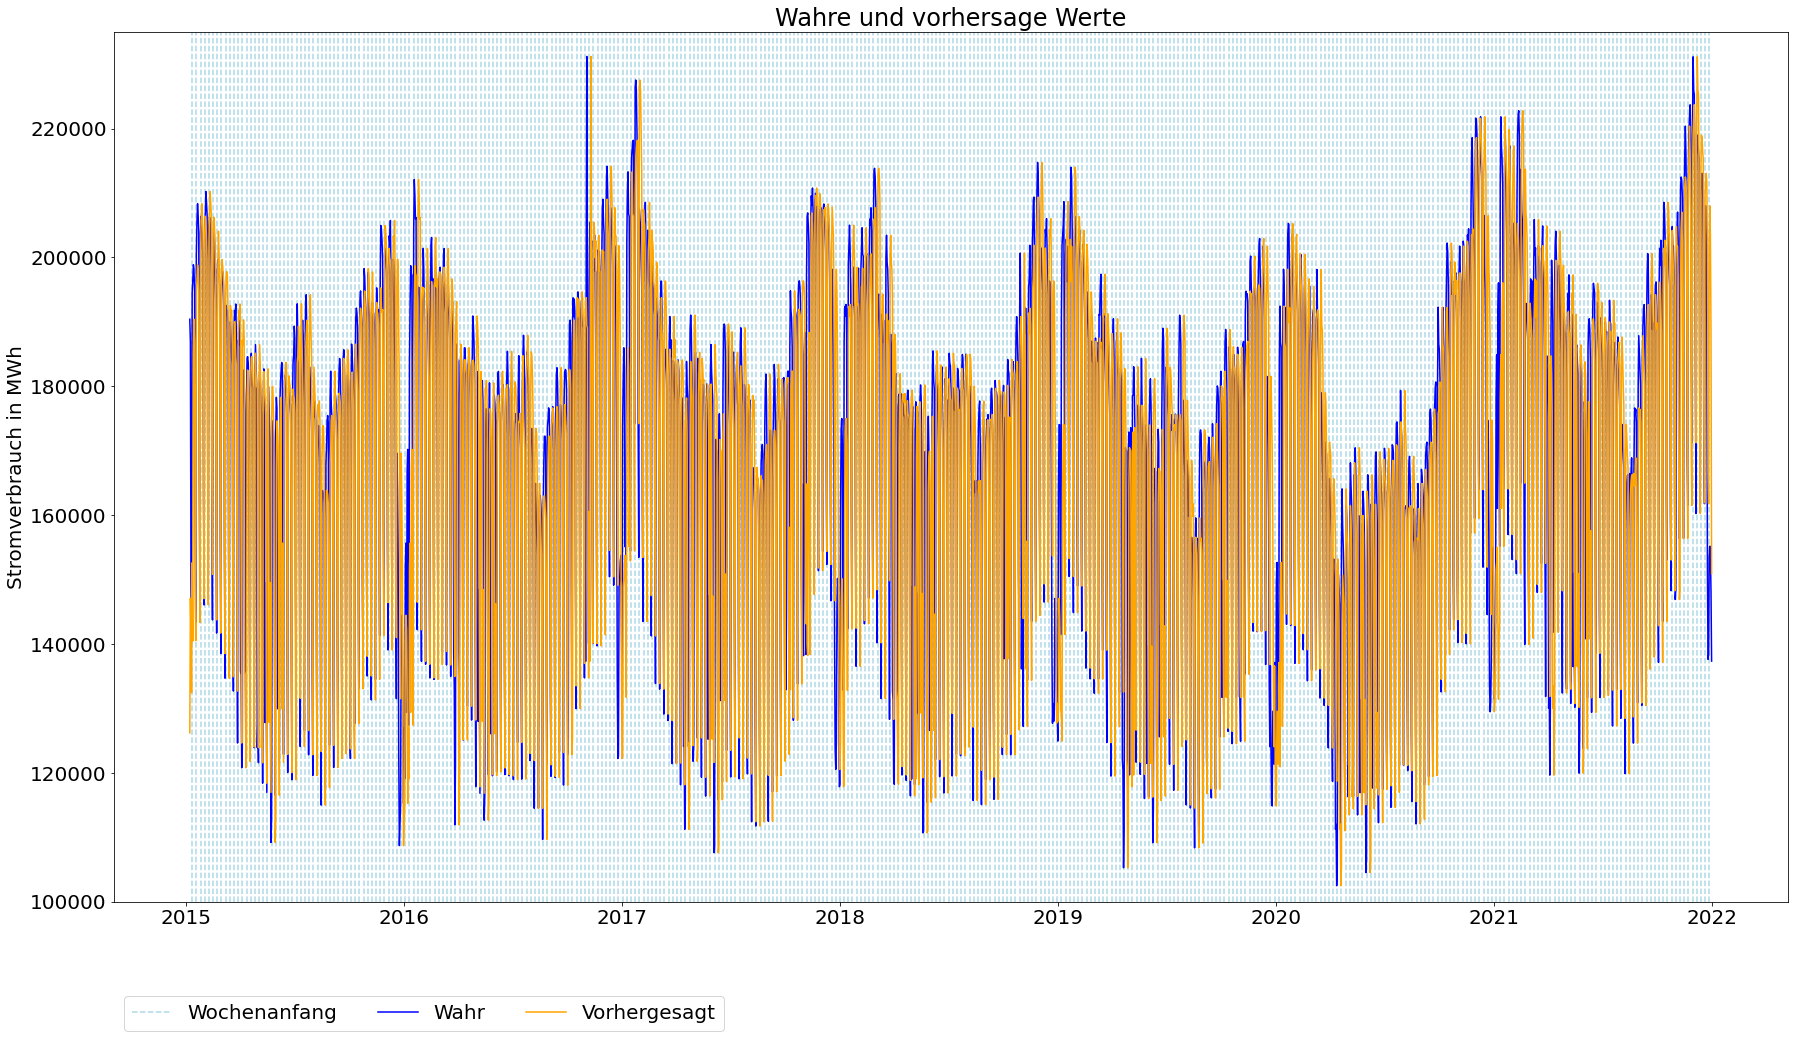

Nur Testdaten

              Test
R2            0.64
MAE        9958.63
MSE   247964509.99
RMSE      15746.89
                  
MAPE         5.8 %


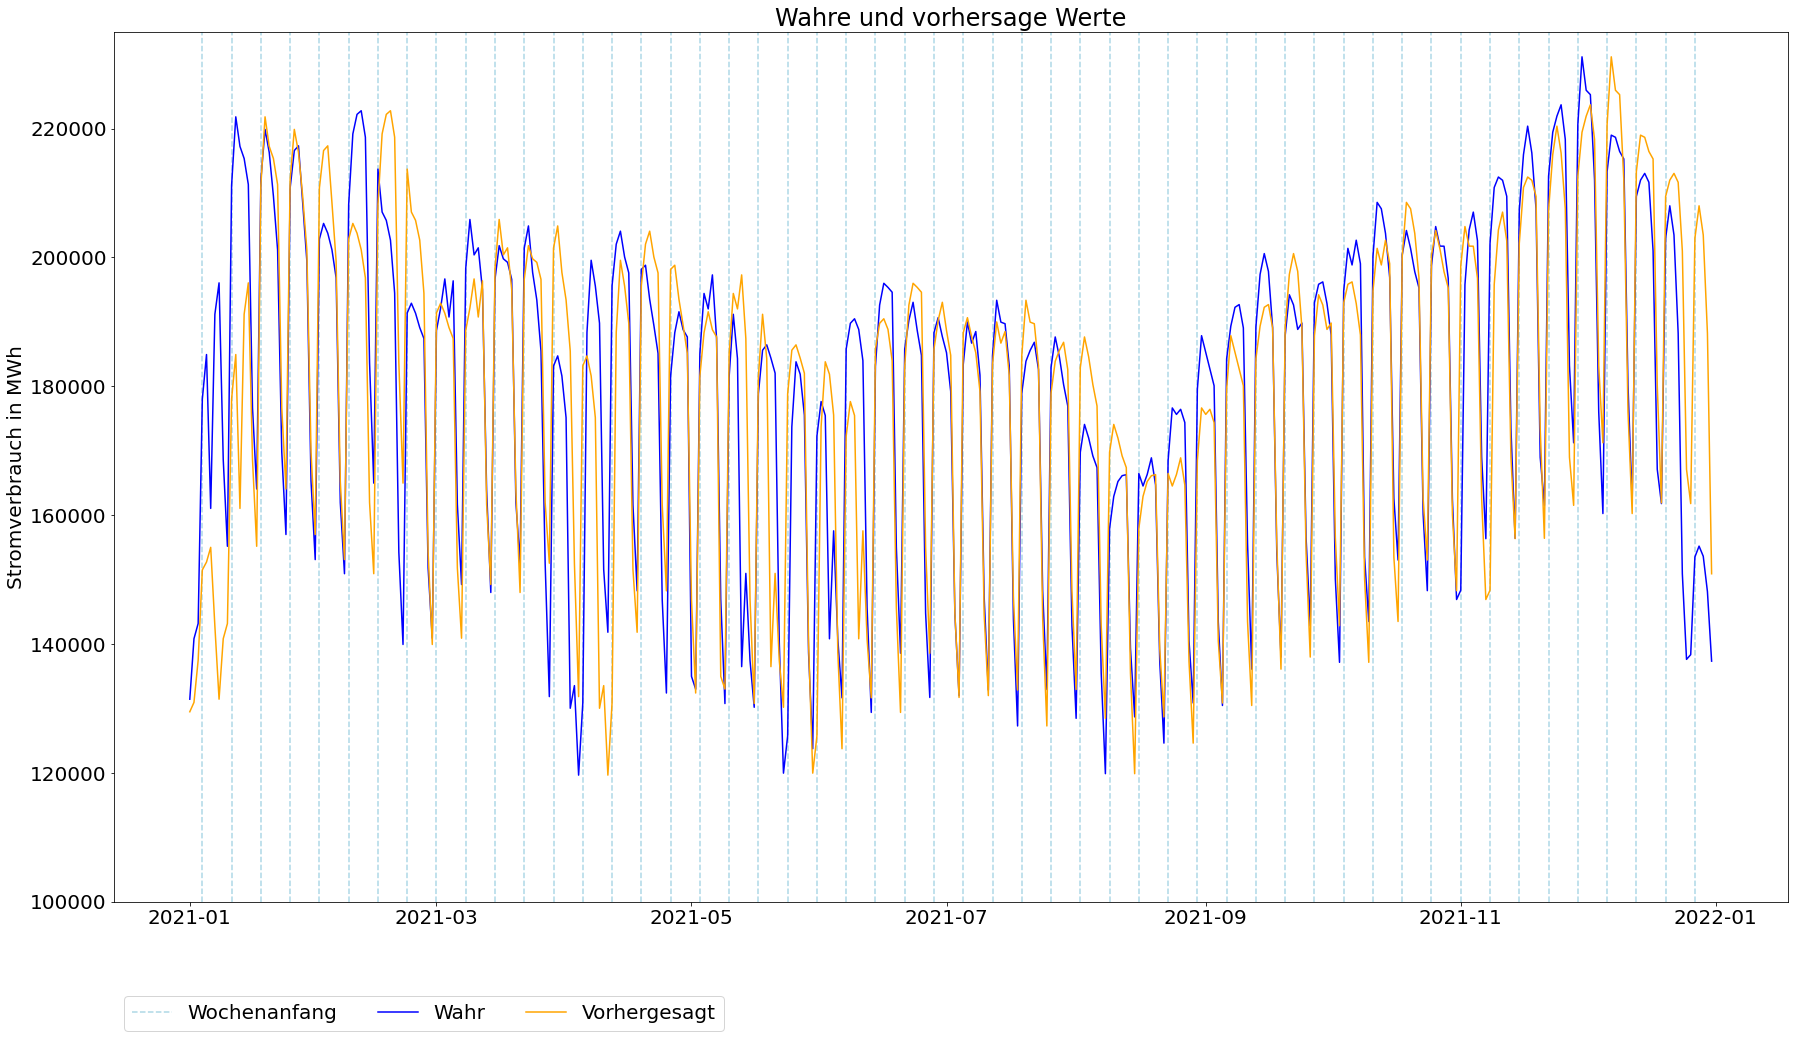

In [5]:
df = pd.read_csv("../2-Data Understanding/data.csv", index_col=0, parse_dates=True, usecols=[0, 1])
df.index.freq = "D"

print(df)
print()
print(df.describe().transpose())
print()

df["vorhergesagter verbrauch"] = df["verbrauch"].shift(7)
df.dropna(inplace=True)
print(df)
print()
print(df.describe().transpose())
print()

print("Gesamte Daten (mit Trainingsdaten)\n")
functions.custom_metrics(df["verbrauch"], df["vorhergesagter verbrauch"])

print("Nur Testdaten\n")
functions.custom_metrics(df["verbrauch"].iloc[-365:], df["vorhergesagter verbrauch"].iloc[-365:])